# Perceptron classifier with MNIST Dataset

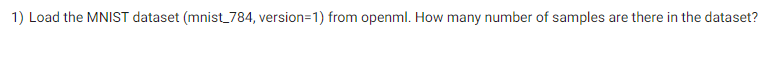

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784',version=1, return_X_y=True)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X.shape

(70000, 784)

Access the sample at the index 2022.
  * What is the label of the sample?
  * What is the mean value of the sample
  * How many zeros are there in the sample? 

Pack the answer in a tuple like (label,mean,num_zeros).

In [ ]:
c=0
for i in X[2022]:
  if i==0:
    c+=1
y[2022],X[2022].mean(), c

('2', 27.761479591836736, 643)

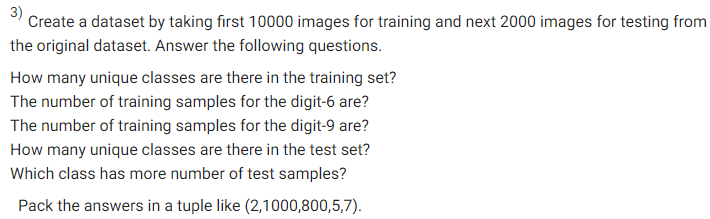

In [ ]:
from sklearn.model_selection import train_test_split
X_train,y_train = X[:10000],y[:10000]
X_test,y_test = X[10000:12000], y[1000:12000]

In [ ]:
#np.unique(X_train) will give an array of only the unique values
len(np.unique(y_train))

10

In [ ]:
type(y_train[0])

str

In [ ]:

np.where(y_train=='6')

1

In [ ]:
y_train[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [ ]:
#y_train is an array object
#to find the number of 6 in y_train ...and as the labels are of type string ...
(y_train=='6').sum()
#OR
len(y_train[y_train=='6'])

1014

In [ ]:
unique, count = np.unique(y_train,return_counts=True)
print(dict(zip(unique,count)))

{'0': 1001, '1': 1127, '2': 991, '3': 1032, '4': 980, '5': 863, '6': 1014, '7': 1070, '8': 944, '9': 978}


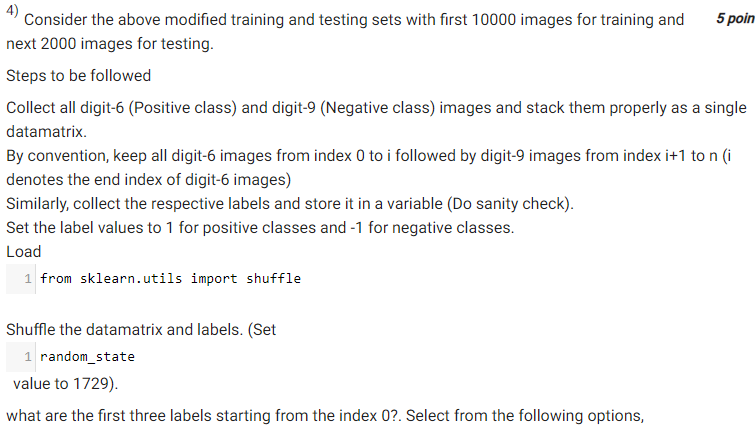

In [ ]:
y_train_6 = 1*np.ones(len(y_train[y_train=='6']))
len(y_train_6)
y_train_9 = -1*np.ones(len(y_train[y_train=='9']))
y_train_combine = np.concatenate((y_train_6,y_train_9),axis=0) #NOTICE the brackets

In [ ]:
indexes6 = np.where(y_train=='6')
indexes9 = np.where(y_train=='9')
X_train_6 = X_train[indexes6]
len(X_train_6)
X_train_9 = X_train[indexes9]
X_train_combine = np.concatenate((X_train_6,X_train_9),axis=0)

In [ ]:
from sklearn.utils import shuffle
X_train_new, y_train_new = shuffle (X_train_combine, y_train_combine, random_state = 1729)

y_train_new[:3]

array([ 1., -1., -1.])

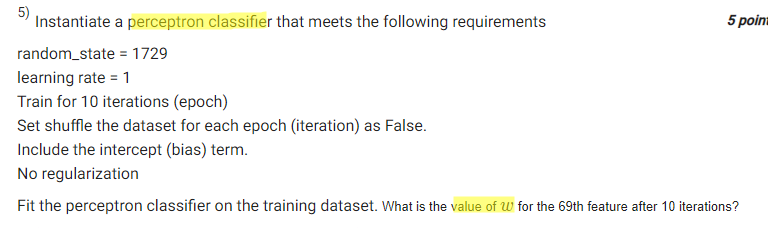

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=10, eta0=1, shuffle=False, random_state=1729, fit_intercept=True)
perceptron.fit(X_train_new,y_train_new)
perceptron.coef_[:,69]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


array([605.])

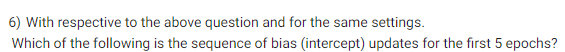

In [ ]:
from sklearn.linear_model import Perceptron
for i in range (1,6):
  perceptron = Perceptron(max_iter=i, eta0=1, shuffle=False, 
                          random_state=1729, fit_intercept=True)
  perceptron.fit(X_train_new,y_train_new)
  print(perceptron.intercept_)

[-1.]
[-4.]
[-4.]
[-6.]
[-5.]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

# GRADED ASSIGNMENT

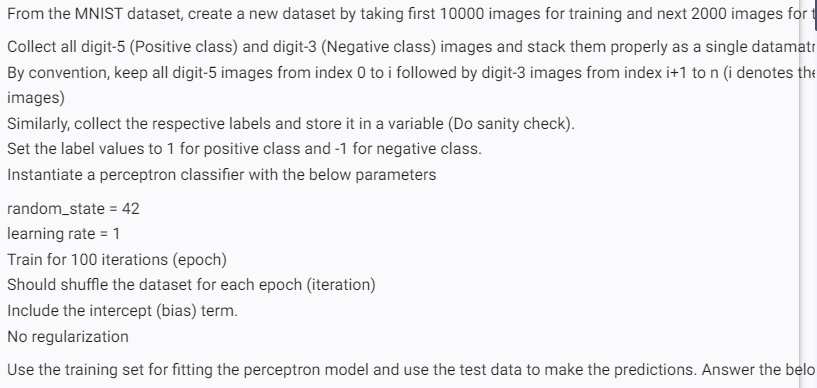

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

In [ ]:
X1,y1 = fetch_openml('mnist_784',version=1,return_X_y=True)

In [ ]:
X1_trg,y1_trg = X1[:10000],y1[:10000]
X1_test,y1_test = X1[10000:12000],y1[10000:12000]
#labels for trg set
y1_trg_5 = 1*np.ones(len(y1_trg[y1_trg=='5']))
y1_trg_3 = -1*np.ones(len(y1_trg[y1_trg=='3']))
y1_trg_5 = np.concatenate((y1_trg_5,y1_trg_3),axis=0)

#labels for test set
y1_test_5 = 1*np.ones(len(y1_test[y1_test=='5']))
y1_test_3 = -1*np.ones(len(y1_test[y1_test=='3']))
y1_test_5 = np.concatenate((y1_test_5,y1_test_3),axis=0)

In [ ]:
#features for trg set 
idx_5 = np.where(y1_trg=='5')
idx_3 = np.where(y1_trg=='3')
X1_5 = X1_trg.iloc[idx_5] #there was some problem using only brackets thus using iloc
X1_3 = X1_trg.iloc[idx_3]
X1_trg_5 = np.concatenate((X1_5,X1_3),axis=0)

#features for test set 
idx_t_5 = np.where(y1_test=='5')
idx_t_3 = np.where(y1_test=='3')
X1_test_5 = X1_test.iloc[idx_t_5] 
X1_test_3 = X1_test.iloc[idx_t_3]
X1_test_5 = np.concatenate((X1_test_5,X1_test_3),axis=0)

In [ ]:
len(y1_5),len(y1_3)

(863, 1032)

In [ ]:
from sklearn.linear_model import Perceptron
percep = Perceptron(random_state=42, eta0=1, max_iter=100, shuffle=False, fit_intercept=True)

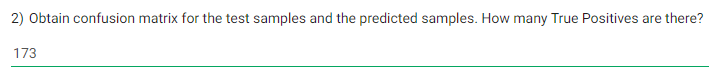

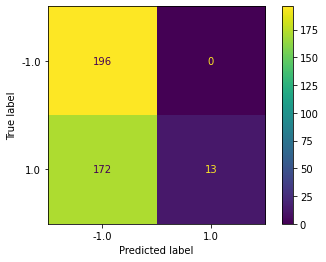

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
#fiiting the perceptron instance with training features and labels of 5 and 3
percep.fit(X1_trg_5, y1_trg_5)
#predicting test labels from test features X1_test
y1_test_5_0 = percep.predict(X1_test_5)
cm_display = ConfusionMatrixDisplay.from_predictions(y1_test_5,y1_test_5_0)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y1_test_5,y1_test_5_0))

              precision    recall  f1-score   support

        -1.0       0.53      1.00      0.70       196
         1.0       1.00      0.07      0.13       185

    accuracy                           0.55       381
   macro avg       0.77      0.54      0.41       381
weighted avg       0.76      0.55      0.42       381



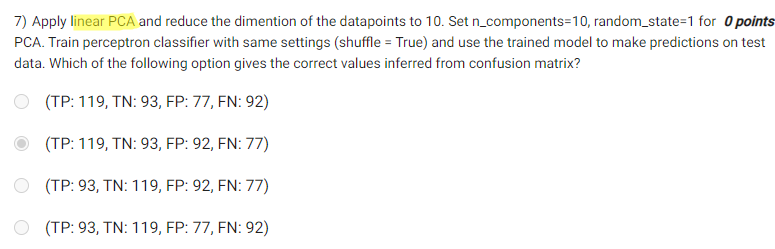

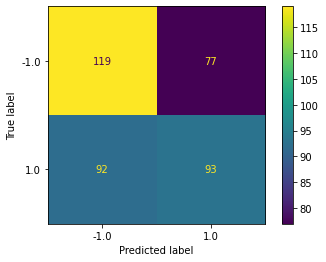

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=10,random_state=1)

X1_train_reduced = pca1.fit(X1_trg_5).transform(X1_trg_5) #NOTE: fitting and transforming the training data for 5 METHOD
X1_test_reduced = pca1.fit(X1_test_5).transform(X1_test_5) #NOTE: only features are reduced

percep1 = Perceptron(random_state=42, eta0=1, max_iter=100, shuffle=True, fit_intercept=True)
percep1.fit(X1_train_reduced,y1_trg_5) #NOTE: reduced features but same labels
y1_pred = percep1.predict(X1_test_reduced)
cm = ConfusionMatrixDisplay.from_predictions(y1_test_5,y1_pred)

In [ ]:
print(classification_report(y1_test_5,y1_pred))

              precision    recall  f1-score   support

        -1.0       0.56      0.61      0.58       196
         1.0       0.55      0.50      0.52       185

    accuracy                           0.56       381
   macro avg       0.56      0.55      0.55       381
weighted avg       0.56      0.56      0.56       381



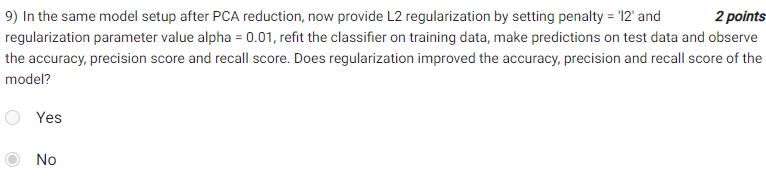

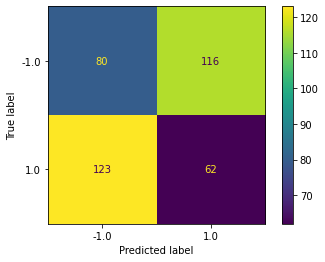

In [ ]:
percep2 = Perceptron(random_state=42, eta0=1, max_iter=100, shuffle=True, fit_intercept=True, penalty='l2',alpha=0.01)
percep2.fit(X1_train_reduced,y1_trg_5)
y1_pred2 = percep2.predict(X1_test_reduced)
cm2 = ConfusionMatrixDisplay.from_predictions(y1_test_5,y1_pred2)

In [ ]:
print(classification_report(y1_test_5,y1_pred2))

              precision    recall  f1-score   support

        -1.0       0.39      0.41      0.40       196
         1.0       0.35      0.34      0.34       185

    accuracy                           0.37       381
   macro avg       0.37      0.37      0.37       381
weighted avg       0.37      0.37      0.37       381



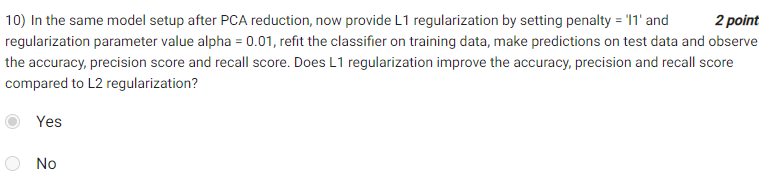

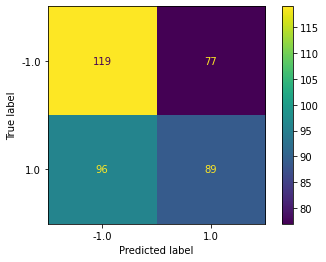

In [ ]:
percep3 = Perceptron(random_state=42, eta0=1, max_iter=100, shuffle=True, fit_intercept=True, penalty='l1',alpha=0.01)
percep3.fit(X1_train_reduced,y1_trg_5)
y1_pred3 = percep3.predict(X1_test_reduced)
cm2 = ConfusionMatrixDisplay.from_predictions(y1_test_5,y1_pred3)

In [ ]:
print(classification_report(y1_test_5,y1_pred3))

              precision    recall  f1-score   support

        -1.0       0.55      0.61      0.58       196
         1.0       0.54      0.48      0.51       185

    accuracy                           0.55       381
   macro avg       0.54      0.54      0.54       381
weighted avg       0.55      0.55      0.54       381

